**План исследования:**

   1. Загрузка и ознакомление с данными,
   2. Предварительная обработка,
   3. Полноценный разведочный анализ,
   4. Разработка новых синтетических признаков,
   5. Проверка на мультиколлинеарность,
   6. Отбор финального набора обучающих признаков,
   7. Выбор и обучение моделей,
   8. Итоговая оценка качества предсказания лучшей модели,
   9. Анализ важности ее признаков.
   
**Дополнительное задание:**

   1. Для тех, кому этого покажется мало у нас есть дополнительное задание — создать web-приложения прототип вашей модели, используя библиотеку Streamlit.
   2. Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.

**Описание Датасета**

- **Year**: Год выпуска автомобиля.
- **Make**: Марка автомобиля.
- **Model**: издание автомобиля определенной марки.
- **Trim**: Уровни отделки салона автомобиля — это просто разные версии модели.
- **Body**: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
- **Transmission**: механизм, который передает мощность от двигателя к колесам.
- **VIN**: идентификационный номер транспортного средства.
- **State**: штат, в котором автомобиль выставлен на аукцион.
- **Condition**: Состояние автомобилей на момент аукциона.
- **Odometer**: расстояние, пройденное автомобилем с момента выпуска.
- **Color**: Цвет кузова автомобиля.
- **Interior**: Цвет салона автомобиля.
- **Seller**: Продавец автомобиля, автосалоны.
- **mmr**: Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.
- **sellingprice**: цена, по которой автомобиль был продан на аукционе.
- **saledate**: Дата продажи автомобиля.

Целевой признак - столбец "sellingprice", в котором представлена цена продажи автомобиля на вторичном рынке. Цель проекта — разработать модель, которая сможет прогнозировать стоимость автомобиля на вторичном рынке исходя из различных признаков и характеристик автомобиля.

## 1. Загрузка и Ознакомление с Данными

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, ElasticNet
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
import lightgbm as lgb
from scipy import stats
import difflib
import streamlit as st

E:\Apps\Anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
E:\Apps\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
E:\Apps\Anaconda\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
E:\Apps\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
train_data = pd.read_csv('E:\Software\Yandex Practicum\Datasets\Masterskaya\\train.csv')
test_data = pd.read_csv('E:\Software\Yandex Practicum\Datasets\Masterskaya\\test.csv')

In [3]:
train_data.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)


In [4]:
print(train_data.info())
print()
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB
None

year                0
make             8043
model            8123
trim 

In [5]:
print(test_data.info())
print()
print(test_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB
None

year                0
make             2061
model            2079
trim             2114
body             2594
trans

In [6]:
print(train_data.shape)
print(test_data.shape)

(440236, 15)
(110058, 14)


## 2. Предварительная Обработка

In [7]:
train_data['sellingprice'] = train_data['sellingprice'].astype(float)

In [8]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

year                0
make             8043
model            8123
trim             8337
body            10393
transmission    51461
vin                 0
state               0
condition        9405
odometer           69
color             586
interior          586
seller              0
sellingprice        0
saledate            0
dtype: int64

year                0
make             2061
model            2079
trim             2114
body             2594
transmission    13011
vin                 0
state               0
condition        2379
odometer           19
color             158
interior          158
seller              0
saledate            0
dtype: int64


In [9]:
train_data['condition'].fillna(train_data['condition'].median(), inplace=True)
train_data['odometer'].fillna(train_data['odometer'].median(), inplace=True)

test_data['condition'].fillna(train_data['condition'].median(), inplace=True)
test_data['odometer'].fillna(train_data['odometer'].median(), inplace=True)

In [10]:
train_data['saledate'] = pd.to_datetime(train_data['saledate'], errors='coerce', utc=True)
train_data['sale_year'] = train_data['saledate'].dt.year
train_data['car_age'] = train_data['sale_year'] - train_data['year']

test_data['saledate'] = pd.to_datetime(test_data['saledate'], errors='coerce', utc=True)
test_data['sale_year'] = test_data['saledate'].dt.year
test_data['car_age'] = test_data['sale_year'] - test_data['year']

In [11]:
# Приведем все к нижнему регистру
train_data['make'] = train_data['make'].str.lower()
train_data['model'] = train_data['model'].str.lower()
train_data['trim'] = train_data['trim'].str.lower()
train_data['body'] = train_data['body'].str.lower()
train_data['transmission'] = train_data['transmission'].str.lower()
train_data['color'] = train_data['color'].str.lower()
train_data['interior'] = train_data['interior'].str.lower()
train_data['state'] = train_data['state'].str.lower()
train_data['seller'] = train_data['seller'].str.lower()

test_data['make'] = test_data['make'].str.lower()
test_data['model'] = test_data['model'].str.lower()
test_data['trim'] = test_data['trim'].str.lower()
test_data['body'] = test_data['body'].str.lower()
test_data['transmission'] = test_data['transmission'].str.lower()
test_data['color'] = test_data['color'].str.lower()
test_data['interior'] = test_data['interior'].str.lower()
test_data['state'] = test_data['state'].str.lower()
test_data['seller'] = test_data['seller'].str.lower()

In [12]:
# Получим имена столбцов с отсутствующими значениями
cols_with_missing = [col for col in train_data.columns if train_data[col].isnull().any()]
print("Столбцы с пропущенными значениями:")
print(cols_with_missing)

Столбцы с пропущенными значениями:
['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']


*ПРИМЕЧАНИЕ*: Чтобы получить более точные значения, нам нужно больше данных. Поэтому я объединил данные train_data и test_data.

In [13]:
data = pd.concat([train_data, test_data], sort=False)

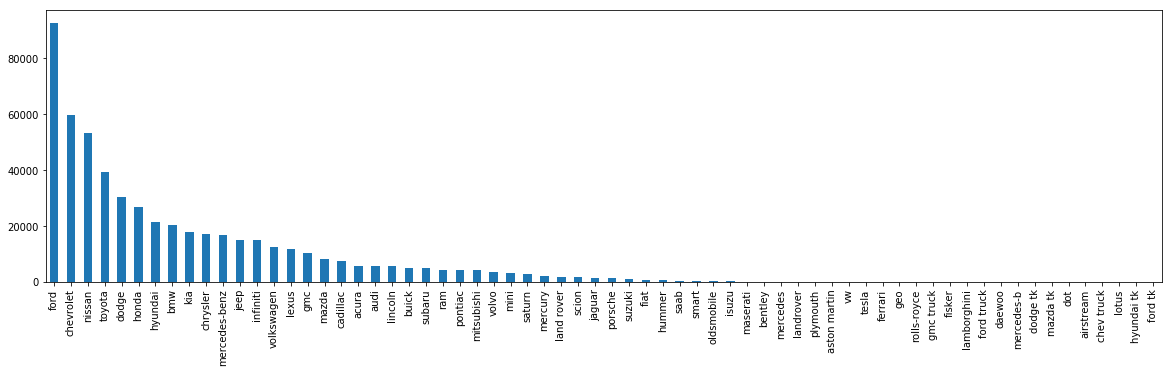

In [14]:
plt.figure(figsize=(20,5))
data['make'].value_counts().plot.bar()
plt.show()

In [15]:
train_data['make'] = train_data['make'].fillna('ford')
test_data['make'] = test_data['make'].fillna('ford')

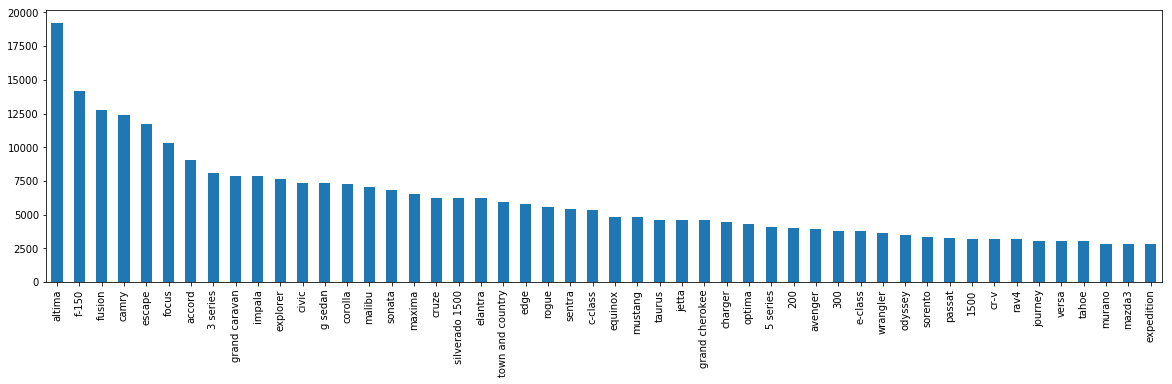

In [16]:
plt.figure(figsize=(20,5))
data['model'].value_counts().head(50).plot.bar()
plt.show()

In [17]:
train_data['model'] = train_data['model'].fillna('altima')
test_data['model'] = test_data['model'].fillna('altima')

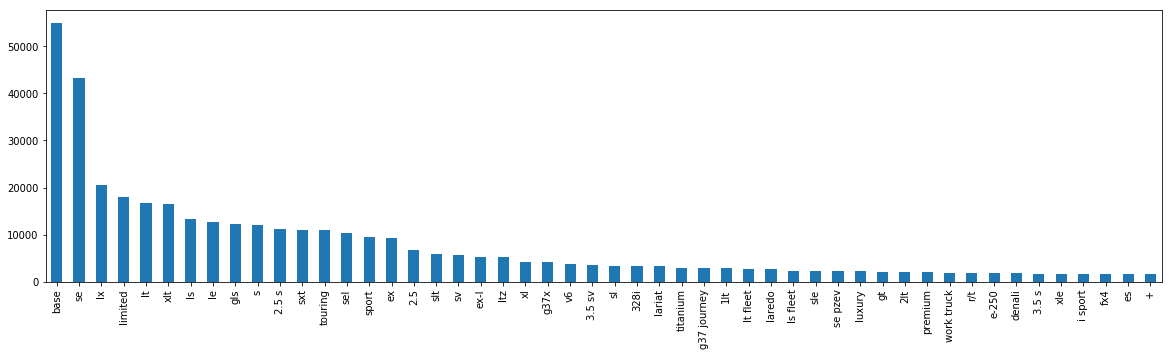

In [18]:
plt.figure(figsize=(20,5))
data['trim'].value_counts().head(50).plot.bar()
plt.show()

In [19]:
train_data['trim'] = train_data['trim'].fillna('base')
test_data['trim'] = test_data['trim'].fillna('base')

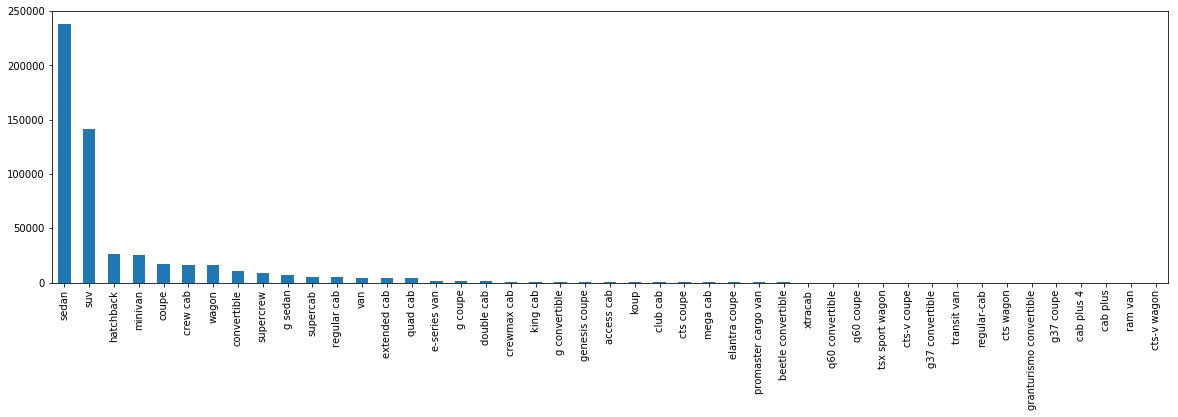

In [20]:
plt.figure(figsize=(20,5))
data['body'].value_counts().plot.bar()
plt.show()

In [21]:
train_data['body'] = train_data['body'].fillna('sedan')
test_data['body'] = test_data['body'].fillna('sedan')

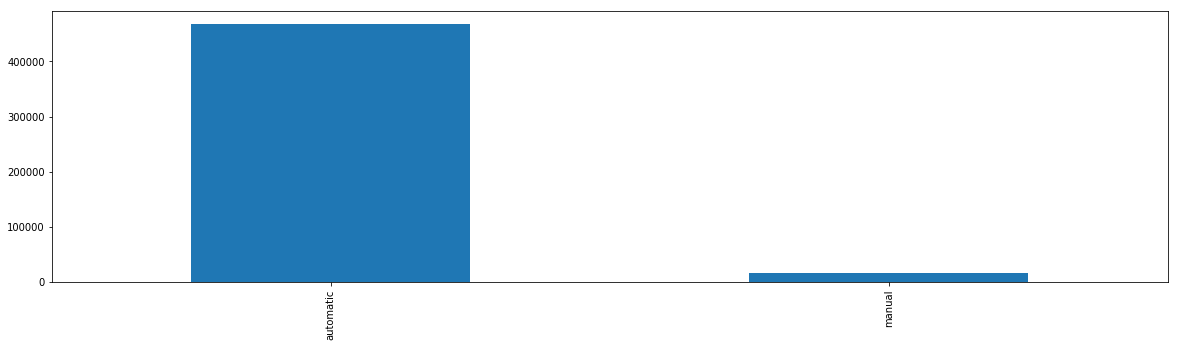

In [22]:
plt.figure(figsize=(20,5))
data['transmission'].value_counts().plot.bar()
plt.show()

In [23]:
train_data['transmission'] = train_data['transmission'].fillna('automatic')
test_data['transmission'] = test_data['transmission'].fillna('automatic')

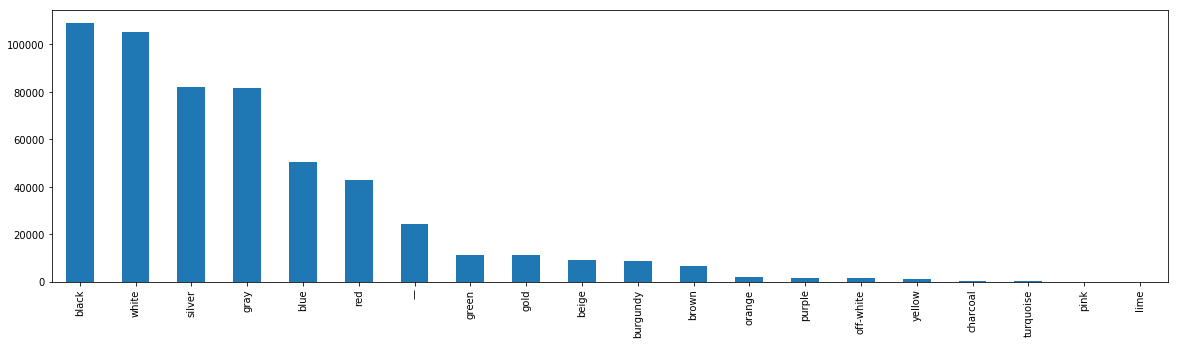

In [24]:
plt.figure(figsize=(20,5))
data['color'].value_counts().plot.bar()
plt.show()

In [25]:
train_data['color'] = train_data['color'].fillna('black')
test_data['color'] = test_data['color'].fillna('black')

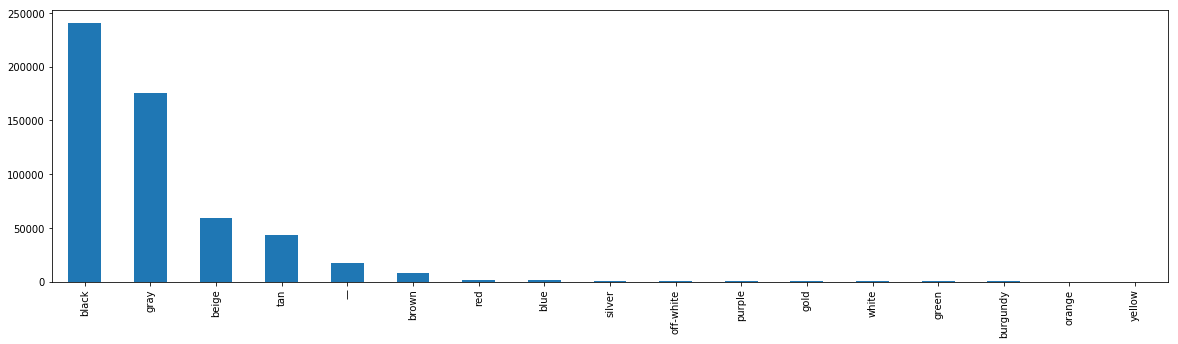

In [26]:
plt.figure(figsize=(20,5))
data['interior'].value_counts().plot.bar()
plt.show()

In [27]:
train_data['interior'] = train_data['interior'].fillna('black')
test_data['interior'] = test_data['interior'].fillna('black')

In [28]:
# Проверим обновленную информацию
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
sale_year       0
car_age         0
dtype: int64

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
saledate        0
sale_year       0
car_age         0
dtype: int64


In [29]:
print(train_data['model'].unique())
print(len(train_data['model'].unique()))

['edge' 'fusion' 'sentra' 'h2' 'mkz' 'g6' 'escape' 'elantra' 'freestyle'
 'altima' 'lucerne' 'windstar' 'silverado 1500' 'murano' 'equinox'
 'accord' 'civic' 'mdx' 'cts' 'taurus' 'srx' 'yukon' '9-3' 'explorer'
 'f-150' 'charger' 'armada' 'gl-class' 'avalon' 'tahoe' 'malibu' 'passat'
 'camry' 'flex' '3 series' 'q50' 'mustang' '300' 'sonata' 'envoy xl'
 'rogue' 'accent' 'maxima' 'forte' 'xf' 'outback' 'grand caravan'
 'e-class' 'cherokee' 'impala' 'optima' '5 series' 'expedition' 'is 250'
 'mks' '200' 'veloster' 'golf' 'rav4' 'e300dt' 'five hundred' 'g coupe'
 'grand cherokee' 'x-type' 'g convertible' 'tacoma' 'xa' 'g sedan' 'tl'
 'liberty' 'soul' '500l' 'town and country' 'hhr' 'wrangler' 'reno'
 'suburban' 'pt cruiser' 'gx 460' 'sienna' 'sl-class' 'envoy' 'patriot'
 'e-series van' 'versa' 'aspen' 'm' 'colorado' 'beetle' 'spark' 'rx 330'
 'rendezvous' 'town car' '1 series' 'venture' 'corolla' 'focus' 'mkx'
 'mx-5 miata' 'traverse' 'pathfinder' 'silverado 2500hd' 'ram pickup 1500'
 's60'

In [30]:
filtered_values = train_data[train_data['model'].str.contains('camry s', case=False, na=False)]
print(filtered_values['model'])

808       camry solara
7913      camry solara
10913     camry solara
12123     camry solara
12204     camry solara
              ...     
428915    camry solara
431759    camry solara
434208    camry solara
437080    camry solara
437877    camry solara
Name: model, Length: 295, dtype: object


In [31]:
def replace_implicit_duplicates(dataframe, column_name, duplicates_dict):
    for duplicates, replacement in duplicates_dict.items():
        dataframe[column_name] = dataframe[column_name].replace(duplicates, replacement)

In [32]:
duplicates_dict = {'camry solara': 'camry', 'accord crosstour': 'accord', 'silverado 1500 classic': 'silverado 1500'}
replace_implicit_duplicates(train_data, 'model', duplicates_dict)
replace_implicit_duplicates(test_data, 'model', duplicates_dict)

In [33]:
filtered_values = train_data[train_data['model'].str.contains('camry s', case=False, na=False)]
print(filtered_values['model'])

Series([], Name: model, dtype: object)


In [34]:
filtered_values = train_data[train_data['model'].str.contains('transit connect', case=False, na=False)]
print(filtered_values['model'])

694       transit connect
698       transit connect
1260      transit connect
2320      transit connect
3383      transit connect
               ...       
435918    transit connect
437382    transit connect
437821    transit connect
438656    transit connect
438845    transit connect
Name: model, Length: 550, dtype: object


In [35]:
duplicates_dict = {
    'camry solara': 'camry',
    'accord crosstour': 'accord',
    'silverado 1500 classic': 'silverado 1500',
    'sierra 1500 classic': 'sierra 1500',
    'silverado 2500hd classic': 'silverado 2500hd',
    'sierra 2500hd classic': 'sierra 2500hd',
    'c/k 1500 series': 'c/k 1500',
    'c/k 2500 series': 'c/k 2500',
    'c/k 3500 series': 'c/k 3500',
    'ram pickup 1500 classic': 'ram pickup 1500',
    'ram pickup 2500': 'ram pickup 2500',
    'ram pickup 3500': 'ram pickup 3500',
    'transit connect': 'transit',
    'econoline cargo': 'econoline',
    'econoline wagon': 'econoline',
    'aerio': 'aerio sx',
    'prius plug-in': 'prius',
    'transit van': 'transit',
    'c/v tradesman': 'c/v cargo van',
    'f430': 'ferrari',
    'g35': 'infiniti g35',
    'g37': 'infiniti g37',
    'g37 convertible': 'infiniti g37',
    'g37 coupe': 'infiniti g37',
    'g55': 'g-class',
    'g8': 'pontiac g8',
    'grand am': 'pontiac grand am',
    'grand prix': 'pontiac grand prix',
    'h2 sut': 'h2',
    'l-series': 'saturn l-series',
    'm35': 'infiniti m35',
    'm37': 'infiniti m37',
    'm45': 'infiniti m45',
    'm6': 'bmw m6',
    'm6 gran coupe': 'bmw m6',
    'mkt': 'lincoln mkt',
    'mkz': 'lincoln mkz',
    'mkz hybrid': 'lincoln mkz',
    'model s': 'tesla model s',
    'montego': 'mercury montego',
    'monterey': 'mercury monterey',
    'mountaineer': 'mercury mountaineer',
    'pickup': 'nissan pickup',
    'ram': 'dodge ram',
    'rdx': 'acura rdx',
    'rl': 'acura rl',
    'rlx': 'acura rlx',
    'rs 4': 'audi rs 4',
    'rs 5': 'audi rs 5',
    'rs 6': 'audi rs 6',
    'rs 7': 'audi rs 7',
    'rx-7': 'mazda rx-7',
    'rx-8': 'mazda rx-8',
    's40': 'volvo s40',
    's60 cross country': 'volvo s60',
    's60 inscription': 'volvo s60',
    's80': 'volvo s80',
    's90': 'volvo s90',
    'sc 300': 'lexus sc 300',
    'sc 400': 'lexus sc 400',
    'sc 430': 'lexus sc 430',
    'slk': 'mercedes-benz slk',
    'slk-class': 'mercedes-benz slk-class',
    'slk250': 'mercedes-benz slk250',
    'slk280': 'mercedes-benz slk280',
    'slk300': 'mercedes-benz slk300',
    'slk320': 'mercedes-benz slk320',
    'slk350': 'mercedes-benz slk350',
    'slk55 amg': 'mercedes-benz slk55 amg',
    'sable': 'mercury sable',
    'sebring convertible': 'chrysler sebring',
    'sebring coupe': 'chrysler sebring',
    'sebring sedan': 'chrysler sebring',
    'sequoia limited': 'sequoia',
    'solstice': 'pontiac solstice',
    'sonoma': 'gmc sonoma',
    'sonata hybrid': 'hyundai sonata',
    'sonata plug-in hybrid': 'hyundai sonata',
    'stratus coupe': 'dodge stratus',
    'stratus sedan': 'dodge stratus',
    'tc': 'scion tc',
    'tl': 'acura tl',
    'tlx': 'acura tlx',
    'tundra limited': 'tundra',
    'vue': 'saturn vue',
    'vue hybrid': 'saturn vue',
    'wrx': 'subaru wrx',
    'x-type': 'jaguar x-type',
    'x1 xdrive28i': 'bmw x1',
    'x3 xdrive28i': 'bmw x3',
    'x4 xdrive28i': 'bmw x4',
    'x5 xdrive35i': 'bmw x5',
    'x6 m': 'bmw x6',
    'xc70': 'volvo xc70',
    'xc90': 'volvo xc90',
    'xf': 'jaguar xf',
    'xj': 'jaguar xj',
    'xj series': 'jaguar xj',
    'xj8': 'jaguar xj8',
    'xk': 'jaguar xk',
    'xk series': 'jaguar xk',
    'xkr': 'jaguar xkr',
    'xkr convertible': 'jaguar xkr',
    'xterra': 'nissan xterra',
    'z3': 'bmw z3',
    'z3 m': 'bmw z3 m',
    'z4 m': 'bmw z4 m',
    'zephyr': 'lincoln zephyr'

}

replace_implicit_duplicates(train_data, 'model', duplicates_dict)
replace_implicit_duplicates(test_data, 'model', duplicates_dict)

In [36]:
filtered_values = train_data[train_data['model'].str.contains('transit connect', case=False, na=False)]
print(filtered_values['model'])

Series([], Name: model, dtype: object)


In [37]:
train_data['model'] = train_data['model'].replace(['f-150', 'f150'], 'f150')
train_data['model'] = train_data['model'].replace(['escape', 'escape hybrid'], 'escape')
train_data['model'] = train_data['model'].replace(['civic coupe', 'civic'], 'civic')
train_data['model'] = train_data['model'].replace(['corolla', 'corolla sedan'], 'corolla')
train_data['model'] = train_data['model'].replace(['tacoma', 'tacoma 4wd'], 'tacoma')
train_data['model'] = train_data['model'].replace(['wrangler', 'wrangler unlimited'], 'wrangler')
train_data['model'] = train_data['model'].replace(['legacy', 'legacy wagon'], 'legacy')
train_data['model'] = train_data['model'].replace(['prius', 'prius hybrid'], 'prius')
train_data['model'] = train_data['model'].replace(['outback', 'outback wagon'], 'outback')
train_data['model'] = train_data['model'].replace(['siera', 'sierra 1500'], 'sierra 1500')

test_data['model'] = test_data['model'].replace(['f-150', 'f150'], 'f150')
test_data['model'] = test_data['model'].replace(['escape', 'escape hybrid'], 'escape')
test_data['model'] = test_data['model'].replace(['civic coupe', 'civic'], 'civic')
test_data['model'] = test_data['model'].replace(['corolla', 'corolla sedan'], 'corolla')
test_data['model'] = test_data['model'].replace(['tacoma', 'tacoma 4wd'], 'tacoma')
test_data['model'] = test_data['model'].replace(['wrangler', 'wrangler unlimited'], 'wrangler')
test_data['model'] = test_data['model'].replace(['legacy', 'legacy wagon'], 'legacy')
test_data['model'] = test_data['model'].replace(['prius', 'prius hybrid'], 'prius')
test_data['model'] = test_data['model'].replace(['outback', 'outback wagon'], 'outback')
test_data['model'] = test_data['model'].replace(['siera', 'sierra 1500'], 'sierra 1500')

In [38]:
print(train_data['model'].unique())
print(len(train_data['model'].unique()))

['edge' 'fusion' 'sentra' 'h2' 'lincoln mkz' 'g6' 'escape' 'elantra'
 'freestyle' 'altima' 'lucerne' 'windstar' 'silverado 1500' 'murano'
 'equinox' 'accord' 'civic' 'mdx' 'cts' 'taurus' 'srx' 'yukon' '9-3'
 'explorer' 'f150' 'charger' 'armada' 'gl-class' 'avalon' 'tahoe' 'malibu'
 'passat' 'camry' 'flex' '3 series' 'q50' 'mustang' '300' 'sonata'
 'envoy xl' 'rogue' 'accent' 'maxima' 'forte' 'jaguar xf' 'outback'
 'grand caravan' 'e-class' 'cherokee' 'impala' 'optima' '5 series'
 'expedition' 'is 250' 'mks' '200' 'veloster' 'golf' 'rav4' 'e300dt'
 'five hundred' 'g coupe' 'grand cherokee' 'jaguar x-type' 'g convertible'
 'tacoma' 'xa' 'g sedan' 'acura tl' 'liberty' 'soul' '500l'
 'town and country' 'hhr' 'wrangler' 'reno' 'suburban' 'pt cruiser'
 'gx 460' 'sienna' 'sl-class' 'envoy' 'patriot' 'e-series van' 'versa'
 'aspen' 'm' 'colorado' 'beetle' 'spark' 'rx 330' 'rendezvous' 'town car'
 '1 series' 'venture' 'corolla' 'focus' 'mkx' 'mx-5 miata' 'traverse'
 'pathfinder' 'silverado 2500

In [39]:
filtered_values = train_data[train_data['model'].str.contains('sierra 1500', case=False, na=False)]
print(filtered_values['model'])

309       sierra 1500
812       sierra 1500
1098      sierra 1500
1218      sierra 1500
1409      sierra 1500
             ...     
439861    sierra 1500
439882    sierra 1500
439924    sierra 1500
439958    sierra 1500
439997    sierra 1500
Name: model, Length: 1868, dtype: object


In [40]:
print(train_data['make'].unique())
print(len(train_data['make'].unique()))

['ford' 'nissan' 'hummer' 'lincoln' 'pontiac' 'hyundai' 'buick'
 'chevrolet' 'honda' 'acura' 'cadillac' 'gmc' 'saab' 'dodge'
 'mercedes-benz' 'toyota' 'volkswagen' 'bmw' 'infiniti' 'chrysler' 'kia'
 'jaguar' 'subaru' 'jeep' 'lexus' 'mercedes' 'scion' 'fiat' 'suzuki'
 'mazda' 'volvo' 'audi' 'mini' 'isuzu' 'mitsubishi' 'smart' 'porsche'
 'land rover' 'saturn' 'ram' 'oldsmobile' 'mercury' 'bentley' 'fisker'
 'maserati' 'tesla' 'landrover' 'vw' 'gmc truck' 'rolls-royce' 'ferrari'
 'plymouth' 'lamborghini' 'geo' 'ford truck' 'aston martin' 'daewoo'
 'mercedes-b' 'dodge tk' 'mazda tk' 'dot' 'airstream']
62


In [41]:
# Заменим неявные дубликаты
train_data['make'] = train_data['make'].replace(['mercedes-benz', 'mercedes-b'], 'mercedes')
train_data['make'] = train_data['make'].replace(['gmc truck'], 'gmc')
train_data['make'] = train_data['make'].replace(['land rover'], 'landrover')
train_data['make'] = train_data['make'].replace(['vw'], 'volkswagen')
train_data['make'] = train_data['make'].replace(['mazda', 'mazda tk'], 'mazda')
train_data['make'] = train_data['make'].replace(['dodge', 'dodge tk'], 'dodge')
train_data['make'] = train_data['make'].replace(['ford', 'ford truck'], 'ford')

test_data['make'] = test_data['make'].replace(['mercedes-benz', 'mercedes-b'], 'mercedes')
test_data['make'] = test_data['make'].replace(['gmc truck'], 'gmc')
test_data['make'] = test_data['make'].replace(['land rover'], 'landrover')
test_data['make'] = test_data['make'].replace(['vw'], 'volkswagen')
test_data['make'] = test_data['make'].replace(['mazda', 'mazda tk'], 'mazda')
test_data['make'] = test_data['make'].replace(['dodge', 'dodge tk'], 'dodge')
test_data['make'] = test_data['make'].replace(['ford', 'ford truck'], 'ford')

# Проверим изменения
print(train_data['make'].unique())
print(len(train_data['make'].unique()))

['ford' 'nissan' 'hummer' 'lincoln' 'pontiac' 'hyundai' 'buick'
 'chevrolet' 'honda' 'acura' 'cadillac' 'gmc' 'saab' 'dodge' 'mercedes'
 'toyota' 'volkswagen' 'bmw' 'infiniti' 'chrysler' 'kia' 'jaguar' 'subaru'
 'jeep' 'lexus' 'scion' 'fiat' 'suzuki' 'mazda' 'volvo' 'audi' 'mini'
 'isuzu' 'mitsubishi' 'smart' 'porsche' 'landrover' 'saturn' 'ram'
 'oldsmobile' 'mercury' 'bentley' 'fisker' 'maserati' 'tesla'
 'rolls-royce' 'ferrari' 'plymouth' 'lamborghini' 'geo' 'aston martin'
 'daewoo' 'dot' 'airstream']
54


In [42]:
print(train_data['body'].unique())
print(len(train_data['body'].unique()))

['suv' 'sedan' 'wagon' 'minivan' 'extended cab' 'regular cab' 'coupe'
 'supercrew' 'convertible' 'crew cab' 'supercab' 'hatchback' 'g coupe'
 'g convertible' 'access cab' 'g sedan' 'e-series van' 'quad cab'
 'tsx sport wagon' 'van' 'cts coupe' 'koup' 'king cab' 'double cab'
 'elantra coupe' 'crewmax cab' 'genesis coupe' 'g37 coupe' 'club cab'
 'beetle convertible' 'mega cab' 'regular-cab' 'xtracab' 'q60 coupe'
 'promaster cargo van' 'cts-v coupe' 'cts wagon' 'cab plus 4'
 'g37 convertible' 'transit van' 'q60 convertible' 'cab plus' 'ram van'
 'granturismo convertible' 'cts-v wagon']
45


In [43]:
# Заменим неявные дубликаты
train_data['body'] = train_data['body'].replace(['cab', 'extended cab', 'regular cab', 'crew cab', 'supercab', 
                                                'access cab', 'quad cab', 'king cab', 'double cab', 'crewmax cab',
                                                'club cab', 'mega cab', 'regular-cab', 'xtracab', 'cab plus 4',
                                                'cab plus'], 'cab')
train_data['body'] = train_data['body'].replace(['g sedan', 'sedan'], 'sedan')
train_data['body'] = train_data['body'].replace(['minivan', 'e-series van', 'van', 'promaster cargo van', 
                                                 'transit van', 'ram van'], 'van')
train_data['body'] = train_data['body'].replace(['wagon', 'tsx sport wagon', 'cts wagon', 'cts-v wagon'], 'wagon')
train_data['body'] = train_data['body'].replace(['coupe', 'g coupe', 'cts coupe', 'elantra coupe', 'genesis coupe', 'g37 coupe',
                                                'genesis coupe' 'g37 coupe', 'q60 coupe', 'cts-v coupe'], 'coupe')
train_data['body'] = train_data['body'].replace(['convertible', 'g convertible', 'beetle convertible', 
                                                'g37 convertible', 'q60 convertible', 'granturismo convertible'], 'convertible')


test_data['body'] = test_data['body'].replace(['cab', 'extended cab', 'regular cab', 'crew cab', 'supercab', 
                                                'access cab', 'quad cab', 'king cab', 'double cab', 'crewmax cab',
                                                'club cab', 'mega cab', 'regular-cab', 'xtracab', 'cab plus 4',
                                                'cab plus'], 'cab')
test_data['body'] = test_data['body'].replace(['g sedan', 'sedan'], 'sedan')
test_data['body'] = test_data['body'].replace(['minivan', 'e-series van', 'van', 'promaster cargo van', 
                                                 'transit van', 'ram van'], 'van')
test_data['body'] = test_data['body'].replace(['wagon', 'tsx sport wagon', 'cts wagon', 'cts-v wagon'], 'wagon')
test_data['body'] = test_data['body'].replace(['coupe', 'g coupe', 'cts coupe', 'elantra coupe', 'genesis coupe', 'g37 coupe',
                                                'genesis coupe' 'g37 coupe', 'q60 coupe', 'cts-v coupe'], 'coupe')
test_data['body'] = test_data['body'].replace(['convertible', 'g convertible', 'beetle convertible', 
                                                'g37 convertible', 'q60 convertible', 'granturismo convertible'], 'convertible')

# Проверим изменения
print(train_data['body'].unique())
print(len(train_data['body'].unique()))
print()
print(test_data['body'].unique())
print(len(test_data['body'].unique()))

['suv' 'sedan' 'wagon' 'van' 'cab' 'coupe' 'supercrew' 'convertible'
 'hatchback' 'koup']
10

['sedan' 'van' 'suv' 'cab' 'wagon' 'hatchback' 'convertible' 'coupe'
 'supercrew' 'koup']
10


In [44]:
print(train_data['trim'].unique())
print(len(train_data['trim'].unique()))

['sel' 'se' '2.0 sl' ... '2.5 x l.l.bean edition' '3500 high roof 140 wb'
 '4x4 v6 xlt sport']
1850


In [45]:
range_of_trims = train_data['trim'].unique()[0:18500]
print(range_of_trims)

['sel' 'se' '2.0 sl' ... '2.5 x l.l.bean edition' '3500 high roof 140 wb'
 '4x4 v6 xlt sport']


In [46]:
train_data.loc[train_data['trim'].str.contains('2.0t premium quattro ', case=False), 'trim'] = '2.0t premium quattro'
train_data.loc[train_data['trim'].str.contains('4x2 ext lariat', case=False), 'trim'] = '4x2'
train_data.loc[train_data['trim'].str.contains('ltz fleet', case=False), 'trim'] = 'ltz fleet'
train_data.loc[train_data['trim'].str.contains('328i xdrive sulev', case=False), 'trim'] = '328i xdrive'
train_data.loc[train_data['trim'].str.contains('sportwagen se pzev', case=False), 'trim'] = 'sportwagen s pzev'
train_data.loc[train_data['trim'].str.contains('premium luxury', case=False), 'trim'] = 'premium luxury'
train_data.loc[train_data['trim'].str.contains('premium 1 turbo', case=False), 'trim'] = 'premium 1 turbo'
train_data.loc[train_data['trim'].str.contains('c300 sport 4matic', case=False), 'trim'] = 'c300 sport 4matic'
train_data.loc[train_data['trim'].str.contains('e-350 super duty xlt', case=False), 'trim'] = 'e-350 super duty'
train_data.loc[train_data['trim'].str.contains('3.0 quattro', case=False), 'trim'] = '3.0 quattro'
train_data.loc[train_data['trim'].str.contains('e-350 super duty xl', case=False), 'trim'] = 'e-350 super duty'
train_data.loc[train_data['trim'].str.contains('ml350 bluetec', case=False), 'trim'] = 'ml350'

test_data.loc[test_data['trim'].str.contains('2.0t premium quattro ', case=False), 'trim'] = '2.0t premium quattro'
test_data.loc[test_data['trim'].str.contains('4x2 ext lariat', case=False), 'trim'] = '4x2'
test_data.loc[test_data['trim'].str.contains('ltz fleet', case=False), 'trim'] = 'ltz fleet'
test_data.loc[test_data['trim'].str.contains('328i xdrive sulev', case=False), 'trim'] = '328i xdrive'
test_data.loc[test_data['trim'].str.contains('sportwagen se pzev', case=False), 'trim'] = 'sportwagen s pzev'
test_data.loc[test_data['trim'].str.contains('premium luxury', case=False), 'trim'] = 'premium luxury'
test_data.loc[test_data['trim'].str.contains('premium 1 turbo', case=False), 'trim'] = 'premium 1 turbo'
test_data.loc[test_data['trim'].str.contains('c300 sport 4matic', case=False), 'trim'] = 'c300 sport 4matic'
test_data.loc[test_data['trim'].str.contains('e-350 super duty xlt', case=False), 'trim'] = 'e-350 super duty'
test_data.loc[test_data['trim'].str.contains('3.0 quattro', case=False), 'trim'] = '3.0 quattro'
test_data.loc[test_data['trim'].str.contains('e-350 super duty xl', case=False), 'trim'] = 'e-350 super duty'
test_data.loc[test_data['trim'].str.contains('ml350 bluetec', case=False), 'trim'] = 'ml350'

In [47]:
print(len(train_data['trim'].unique()))

1842


In [48]:
print(train_data['seller'].unique())
print(len(train_data['seller'].unique()))

['santander consumer' 'ars/avis budget group' 'nissan-infiniti lt' ...
 'autostar enterprises' 'kocourek nissan' 'studio city auto group']
13025


In [49]:
train_data.loc[train_data['seller'].str.contains('nissan', case=False), 'seller'] = 'nissan'
train_data.loc[train_data['seller'].str.contains('santander', case=False), 'seller'] = 'santander'
train_data.loc[train_data['seller'].str.contains('ford', case=False), 'seller'] = 'ford'
train_data.loc[train_data['seller'].str.contains('hertz', case=False), 'seller'] = 'hertz'
train_data.loc[train_data['seller'].str.contains('avis', case=False), 'seller'] = 'avis'
train_data.loc[train_data['seller'].str.contains('wells fargo', case=False), 'seller'] = 'wells fargo'
train_data.loc[train_data['seller'].str.contains('tdaf', case=False), 'seller'] = 'tdaf'
train_data.loc[train_data['seller'].str.contains('ge', case=False), 'seller'] = 'ge'
train_data.loc[train_data['seller'].str.contains('hyundai', case=False), 'seller'] = 'hyundai'
train_data.loc[train_data['seller'].str.contains('jpmorgan', case=False), 'seller'] = 'jpmorgan'
train_data.loc[train_data['seller'].str.contains('honda', case=False), 'seller'] = 'honda'
train_data.loc[train_data['seller'].str.contains('mercedes', case=False), 'seller'] = 'mercedes'
train_data.loc[train_data['seller'].str.contains('chrysler', case=False), 'seller'] = 'chrysler'
train_data.loc[train_data['seller'].str.contains('gm', case=False), 'seller'] = 'gm'
train_data.loc[train_data['seller'].str.contains('hollenshead', case=False), 'seller'] = 'hollenshead'
train_data.loc[train_data['seller'].str.contains('kia', case=False), 'seller'] = 'kia'
train_data.loc[train_data['seller'].str.contains('toyota', case=False), 'seller'] = 'toyota'
train_data.loc[train_data['seller'].str.contains('dtg', case=False), 'seller'] = 'dtg'
train_data.loc[train_data['seller'].str.contains('lexus', case=False), 'seller'] = 'lexus'
train_data.loc[train_data['seller'].str.contains('vw', case=False), 'seller'] = 'vw'
train_data.loc[train_data['seller'].str.contains('dt', case=False), 'seller'] = 'dt'
train_data.loc[train_data['seller'].str.contains('adcock', case=False), 'seller'] = 'adcock'
train_data.loc[train_data['seller'].str.contains('subaru', case=False), 'seller'] = 'subaru'
train_data.loc[train_data['seller'].str.contains('bmw', case=False), 'seller'] = 'bmw'
train_data.loc[train_data['seller'].str.contains('infiniti', case=False), 'seller'] = 'infiniti'
train_data.loc[train_data['seller'].str.contains('volvo', case=False), 'seller'] = 'volvo'
train_data.loc[train_data['seller'].str.contains('mitsubishi', case=False), 'seller'] = 'mitsubishi'
train_data.loc[train_data['seller'].str.contains('mazda', case=False), 'seller'] = 'mazda'
train_data.loc[train_data['seller'].str.contains('porsche', case=False), 'seller'] = 'porsche'
train_data.loc[train_data['seller'].str.contains('jaguar', case=False), 'seller'] = 'jaguar'


test_data.loc[test_data['seller'].str.contains('nissan', case=False), 'seller'] = 'nissan'
test_data.loc[test_data['seller'].str.contains('santander', case=False), 'seller'] = 'santander'
test_data.loc[test_data['seller'].str.contains('ford', case=False), 'seller'] = 'ford'
test_data.loc[test_data['seller'].str.contains('hertz', case=False), 'seller'] = 'hertz'
test_data.loc[test_data['seller'].str.contains('avis', case=False), 'seller'] = 'avis'
test_data.loc[test_data['seller'].str.contains('wells fargo', case=False), 'seller'] = 'wells fargo'
test_data.loc[test_data['seller'].str.contains('tdaf', case=False), 'seller'] = 'tdaf'
test_data.loc[test_data['seller'].str.contains('ge', case=False), 'seller'] = 'ge'
test_data.loc[test_data['seller'].str.contains('hyundai', case=False), 'seller'] = 'hyundai'
test_data.loc[test_data['seller'].str.contains('jpmorgan', case=False), 'seller'] = 'jpmorgan'
test_data.loc[test_data['seller'].str.contains('honda', case=False), 'seller'] = 'honda'
test_data.loc[test_data['seller'].str.contains('mercedes', case=False), 'seller'] = 'mercedes'
test_data.loc[test_data['seller'].str.contains('chrysler', case=False), 'seller'] = 'chrysler'
test_data.loc[test_data['seller'].str.contains('gm', case=False), 'seller'] = 'gm'
test_data.loc[test_data['seller'].str.contains('hollenshead', case=False), 'seller'] = 'hollenshead'
test_data.loc[test_data['seller'].str.contains('kia', case=False), 'seller'] = 'kia'
test_data.loc[test_data['seller'].str.contains('toyota', case=False), 'seller'] = 'toyota'
test_data.loc[test_data['seller'].str.contains('dtg', case=False), 'seller'] = 'dtg'
test_data.loc[test_data['seller'].str.contains('lexus', case=False), 'seller'] = 'lexus'
test_data.loc[test_data['seller'].str.contains('vw', case=False), 'seller'] = 'vw'
test_data.loc[test_data['seller'].str.contains('dt', case=False), 'seller'] = 'dt'
test_data.loc[test_data['seller'].str.contains('adcock', case=False), 'seller'] = 'adcock'
test_data.loc[test_data['seller'].str.contains('subaru', case=False), 'seller'] = 'subaru'
test_data.loc[test_data['seller'].str.contains('bmw', case=False), 'seller'] = 'bmw'
test_data.loc[test_data['seller'].str.contains('infiniti', case=False), 'seller'] = 'infiniti'
test_data.loc[test_data['seller'].str.contains('volvo', case=False), 'seller'] = 'volvo'
test_data.loc[test_data['seller'].str.contains('mitsubishi', case=False), 'seller'] = 'mitsubishi'
test_data.loc[test_data['seller'].str.contains('mazda', case=False), 'seller'] = 'mazda'
test_data.loc[test_data['seller'].str.contains('porsche', case=False), 'seller'] = 'porsche'
test_data.loc[test_data['seller'].str.contains('jaguar', case=False), 'seller'] = 'jaguar'

In [50]:
print(train_data['seller'].unique())
print(len(train_data['seller'].unique()))

['santander' 'avis' 'nissan' ... 'trra motors llc' 'autostar enterprises'
 'studio city auto group']
9046


In [51]:
filtered_values = train_data[train_data['seller'].str.contains('jaguar', case=False, na=False)]
print(filtered_values['seller'])

67        jaguar
683       jaguar
1814      jaguar
1897      jaguar
3234      jaguar
           ...  
434269    jaguar
436661    jaguar
436730    jaguar
438576    jaguar
440122    jaguar
Name: seller, Length: 343, dtype: object


## 3. Полноценный Разведочный Анализ

Skewness: 1.973232
Kurtosis: 11.471919


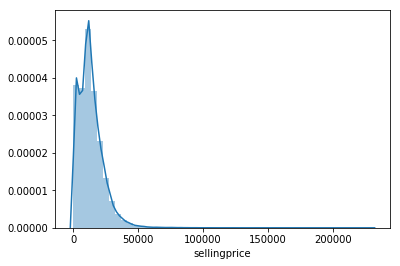

In [52]:
sns.distplot(train_data['sellingprice'])

print("Skewness: %f" % train_data['sellingprice'].skew())
print("Kurtosis: %f" % train_data['sellingprice'].kurt())

**Мы можем заметить, что распределение цен показывает высокую положительную асимметрию влево (Skewness > 1). Значение эксцесса (Kurtosis) 11 очень велико, что означает, что в наборе данных много выбросов.**

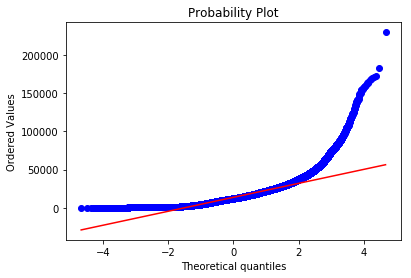

In [53]:
# График нормальной вероятности
fig = plt.figure()
res = stats.probplot(train_data['sellingprice'], plot=plt)

In [54]:
train_data.describe()

,year,condition,odometer,sellingprice,sale_year,car_age
count,440236.000000,440236.000000,440236.000000,440236.000000,440236.000000,440236.000000
mean,2010.040101,3.428814,68341.875235,13592.209588,2014.902511,4.862410
std,3.977945,0.940111,53538.394083,9751.479098,0.296622,3.954387
min,1982.000000,1.000000,1.000000,1.000000,2014.000000,-1.000000
25%,2007.000000,2.700000,28260.000000,6900.000000,2015.000000,2.000000
50%,2012.000000,3.600000,52098.000000,12100.000000,2015.000000,3.000000
75%,2013.000000,4.200000,99266.000000,18200.000000,2015.000000,7.000000
max,2015.000000,5.000000,999999.000000,230000.000000,2015.000000,33.000000


*Основываясь на сводной статистике train_data, следующие признаки могут иметь потенциальные выбросы:*

1. **odometer**: максимальное показание одометра составляет 999 999 миль, что значительно выше значения 75-го процентиля, равного 99 266 милям. Это говорит о наличии потенциальных выбросов с чрезвычайно большим пробегом.

2. **sellingprice (целевой признак)**: минимальная цена продажи равна 1, что может указывать на пропущенные значения или почти бесплатные автомобили. Это значение значительно отличается от других цен и может считаться выбросом или ошибкой данных.

3. **car_age**: минимальный возраст автомобиля равен -1, что не является допустимым значением. Это предполагает наличие потенциальных выбросов или ошибочных данных.

Также следует указать про признак sale_year: **Год продажи автомобилей в наборе данных преимущественно 2015**, на что указывает значение 75-го процентиля.

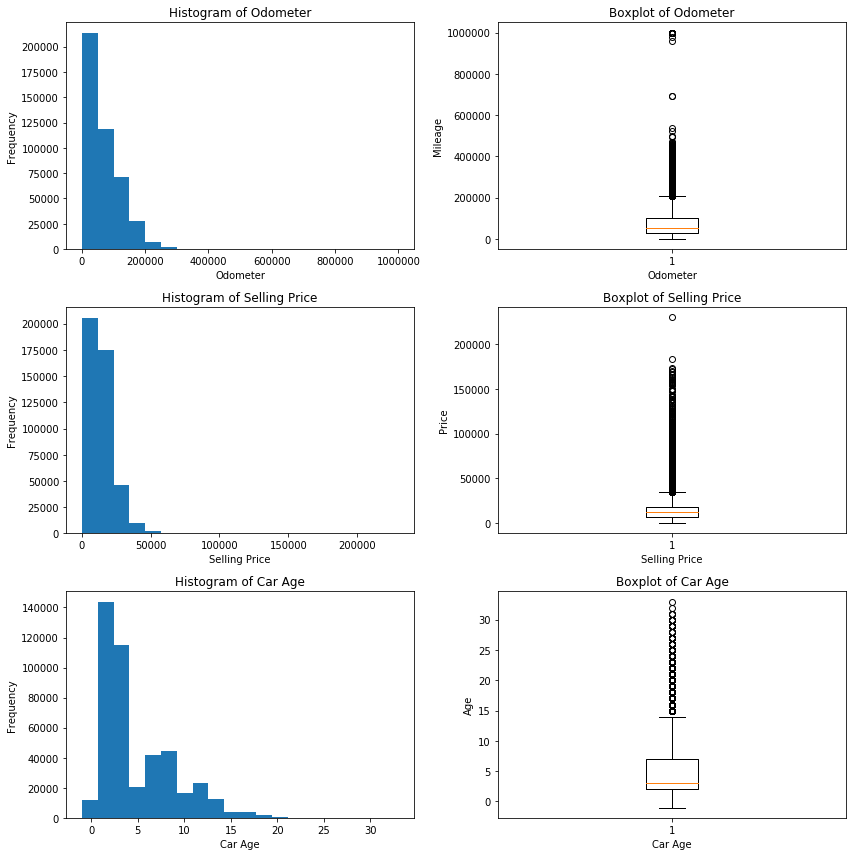

In [55]:
# Создание гистограмм и коробчатых диаграмм
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Odometer
axes[0, 0].hist(train_data['odometer'], bins=20)
axes[0, 0].set_xlabel('Odometer')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Odometer')

axes[0, 1].boxplot(train_data['odometer'])
axes[0, 1].set_xlabel('Odometer')
axes[0, 1].set_ylabel('Mileage')
axes[0, 1].set_title('Boxplot of Odometer')

# sellingprice
axes[1, 0].hist(train_data['sellingprice'], bins=20)
axes[1, 0].set_xlabel('Selling Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Selling Price')

axes[1, 1].boxplot(train_data['sellingprice'])
axes[1, 1].set_xlabel('Selling Price')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Boxplot of Selling Price')

# car_age
axes[2, 0].hist(train_data['car_age'], bins=20)
axes[2, 0].set_xlabel('Car Age')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Histogram of Car Age')

axes[2, 1].boxplot(train_data['car_age'])
axes[2, 1].set_xlabel('Car Age')
axes[2, 1].set_ylabel('Age')
axes[2, 1].set_title('Boxplot of Car Age')

plt.tight_layout()
plt.show()

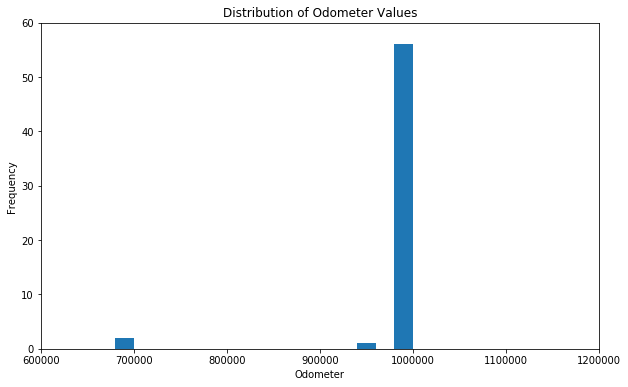

In [56]:
# Более подробная гистограмма столбца одометра
plt.figure(figsize=(10, 6))
plt.hist(train_data['odometer'], bins=50)
plt.xlim(600000, 1200000)
plt.ylim(0, 60)
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer Values')
plt.show()

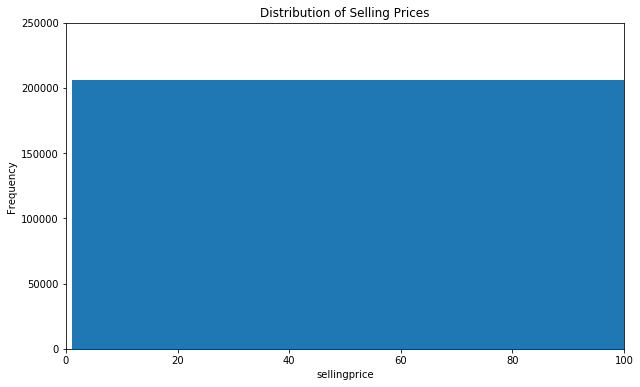

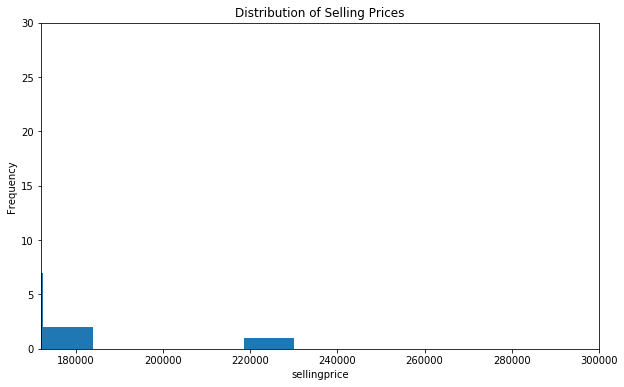

In [57]:
# Более подробная гистограмма столбца sellingprice - нижний порог выброса
plt.figure(figsize=(10, 6))
plt.hist(train_data['sellingprice'], bins=20)
plt.xlim(0, 100)
plt.ylim(0, 250000)
plt.xlabel('sellingprice')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

# Более подробная гистограмма столбца sellingprice - верхний порог выброса
plt.figure(figsize=(10, 6))
plt.hist(train_data['sellingprice'], bins=20)
plt.xlim(172000, 300000)
plt.ylim(0, 30)
plt.xlabel('sellingprice')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

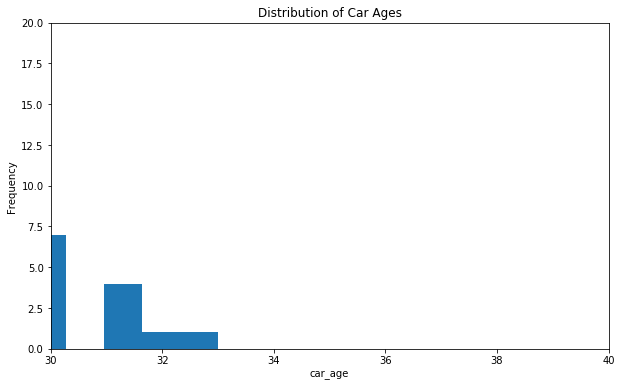

In [58]:
# Более подробная гистограмма столбца car_age
plt.figure(figsize=(10, 6))
plt.hist(train_data['car_age'], bins=50)
plt.xlim(30, 40)
plt.ylim(0, 20)
plt.xlabel('car_age')
plt.ylabel('Frequency')
plt.title('Distribution of Car Ages')
plt.show()

In [59]:
# Вычислим медианные значения для столбцов
odometer_median = train_data['odometer'].median()
sp_median = train_data['sellingprice'].median()
car_age_median = train_data['car_age'].median()

# Замена выбросов в столбцах odometer и sellingprice медианными значениями
odometer_threshold = 600000
train_data.loc[train_data['odometer'] > odometer_threshold, 'odometer'] = odometer_median

sp_l_thr = 100
sp_up_thr = 200000
train_data.loc[(train_data['sellingprice'] < sp_l_thr) | (train_data['sellingprice'] > sp_up_thr), 'sellingprice'] = sp_median

# Замена выбросов в столбце car_age медианными значениями
car_age_l_thr = 0
car_age_up_thr = 34
train_data.loc[(train_data['car_age'] < car_age_l_thr) | (train_data['car_age'] > car_age_up_thr), 'car_age'] = car_age_median

In [60]:
# То же самое для тестового набора
test_data.loc[test_data['odometer'] > odometer_threshold, 'odometer'] = odometer_median
test_data.loc[(test_data['car_age'] < car_age_l_thr) | (test_data['car_age'] > car_age_up_thr), 'car_age'] = car_age_median

In [61]:
train_data.describe()

,year,condition,odometer,sellingprice,sale_year,car_age
count,440236.000000,440236.000000,440236.000000,440236.000000,440236.000000,440236.000000
mean,2010.040101,3.428814,68216.361856,13591.769592,2014.902511,4.863918
std,3.977945,0.940111,52463.927639,9745.980714,0.296622,3.952913
min,1982.000000,1.000000,1.000000,100.000000,2014.000000,0.000000
25%,2007.000000,2.700000,28260.000000,6900.000000,2015.000000,2.000000
50%,2012.000000,3.600000,52098.000000,12100.000000,2015.000000,3.000000
75%,2013.000000,4.200000,99239.000000,18200.000000,2015.000000,7.000000
max,2015.000000,5.000000,537334.000000,183000.000000,2015.000000,33.000000


In [62]:
train_data.info()
print()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          440236 non-null  int64              
 1   make          440236 non-null  object             
 2   model         440236 non-null  object             
 3   trim          440236 non-null  object             
 4   body          440236 non-null  object             
 5   transmission  440236 non-null  object             
 6   vin           440236 non-null  object             
 7   state         440236 non-null  object             
 8   condition     440236 non-null  float64            
 9   odometer      440236 non-null  float64            
 10  color         440236 non-null  object             
 11  interior      440236 non-null  object             
 12  seller        440236 non-null  object             
 13  sellingprice  440236 non-null  float64      

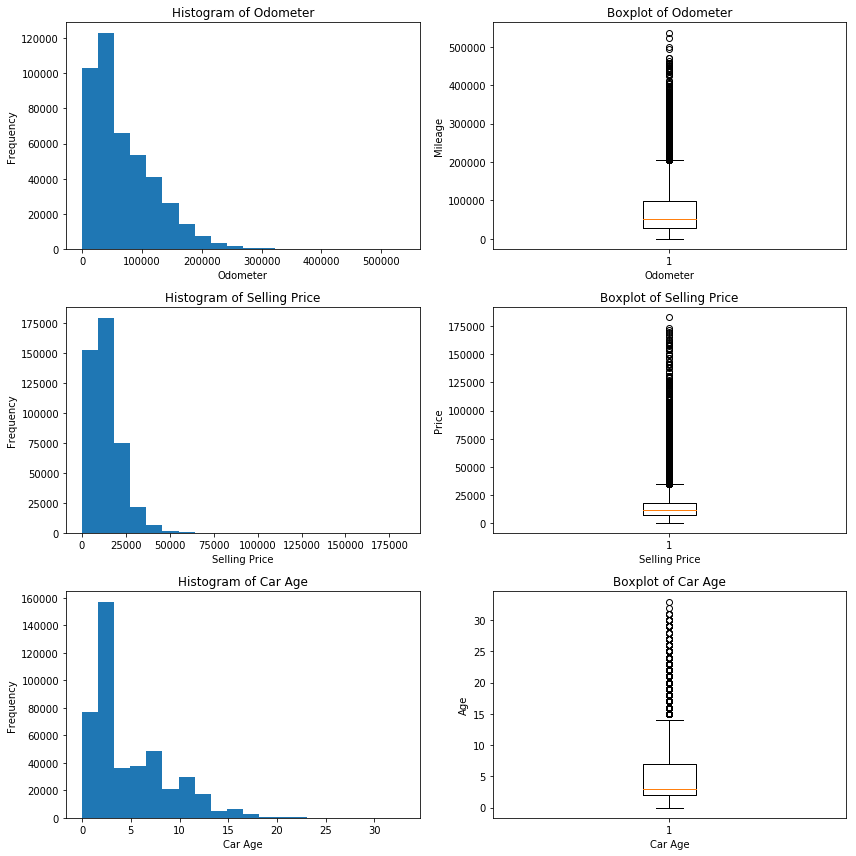

In [63]:
# Создание гистограмм и коробчатых диаграмм
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Odometer
axes[0, 0].hist(train_data['odometer'], bins=20)
axes[0, 0].set_xlabel('Odometer')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Odometer')

axes[0, 1].boxplot(train_data['odometer'])
axes[0, 1].set_xlabel('Odometer')
axes[0, 1].set_ylabel('Mileage')
axes[0, 1].set_title('Boxplot of Odometer')

# sellingprice
axes[1, 0].hist(train_data['sellingprice'], bins=20)
axes[1, 0].set_xlabel('Selling Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Selling Price')

axes[1, 1].boxplot(train_data['sellingprice'])
axes[1, 1].set_xlabel('Selling Price')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Boxplot of Selling Price')

# car_age
axes[2, 0].hist(train_data['car_age'], bins=20)
axes[2, 0].set_xlabel('Car Age')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Histogram of Car Age')

axes[2, 1].boxplot(train_data['car_age'])
axes[2, 1].set_xlabel('Car Age')
axes[2, 1].set_ylabel('Age')
axes[2, 1].set_title('Boxplot of Car Age')

plt.tight_layout()
plt.show()

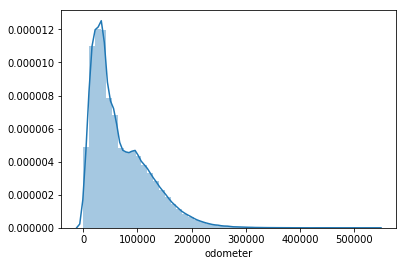

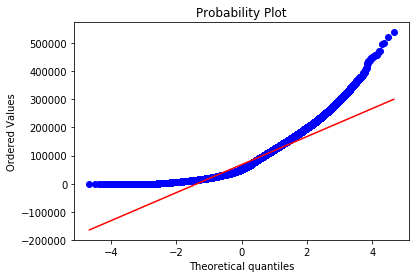

In [64]:
sns.distplot(train_data['odometer'], fit=None)
fig = plt.figure()
res = stats.probplot(train_data['odometer'], plot=plt)

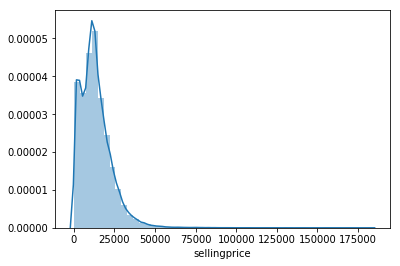

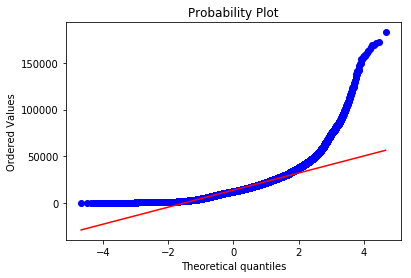

In [65]:
# Преобразованная гистограмма и график нормальной вероятности
sns.distplot(train_data['sellingprice'], fit=None)
fig = plt.figure()
res = stats.probplot(train_data['sellingprice'], plot=plt)

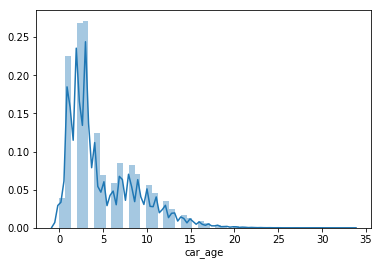

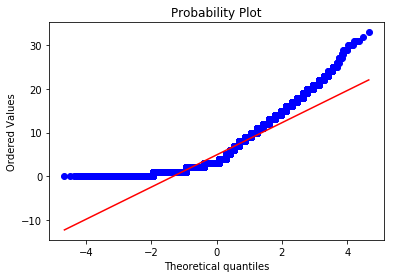

In [66]:
sns.distplot(train_data['car_age'], fit=None)
fig = plt.figure()
res = stats.probplot(train_data['car_age'], plot=plt)

In [67]:
# Найдем наиболее важные признаки по отношению к целевой цене
print("Найдем наиболее важные признаки по отношению к целевой цене")
corr_matrix = train_data.corr()
corr_matrix.sort_values(["sellingprice"], ascending = False, inplace = True)
print(corr_matrix.sellingprice)

Найдем наиболее важные признаки по отношению к целевой цене
sellingprice    1.000000
year            0.587117
condition       0.530145
sale_year       0.077384
car_age        -0.584593
odometer       -0.592232
Name: sellingprice, dtype: float64


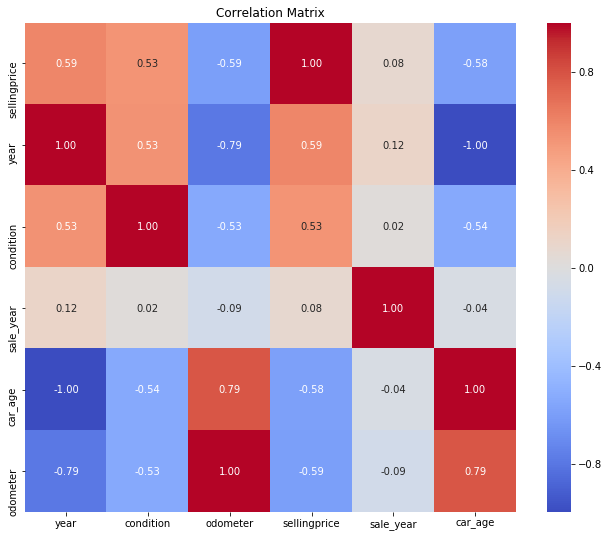

In [68]:
# Создадим тепловую карту
plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Из графика можно понять, что:
1. Признак **sale_year** можно не включать в список обучающих признаков.
2. Остальные признаки можно оставить пока.

## 4. Разработка новых синтетических признаков

In [69]:
# Сделано выше!

In [70]:
train_data['make_model'] = train_data['make'] + ' ' + train_data['model']
train_data['trim_body'] = train_data['trim'] + ' ' + train_data['body']
train_data['seller_state'] = train_data['seller'] + ' ' + train_data['state']

test_data['make_model'] = test_data['make'] + ' ' + test_data['model']
test_data['trim_body'] = test_data['trim'] + ' ' + test_data['body']
test_data['seller_state'] = test_data['seller'] + ' ' + test_data['state']

## 5. Проверка на мультиколлинеарность

In [71]:
train_data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'saledate', 'sale_year', 'car_age', 'make_model', 'trim_body',
       'seller_state'],
      dtype='object')

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          440236 non-null  int64              
 1   make          440236 non-null  object             
 2   model         440236 non-null  object             
 3   trim          440236 non-null  object             
 4   body          440236 non-null  object             
 5   transmission  440236 non-null  object             
 6   vin           440236 non-null  object             
 7   state         440236 non-null  object             
 8   condition     440236 non-null  float64            
 9   odometer      440236 non-null  float64            
 10  color         440236 non-null  object             
 11  interior      440236 non-null  object             
 12  seller        440236 non-null  object             
 13  sellingprice  440236 non-null  float64      

In [73]:
categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller', 
                    'make_model', 'trim_body', 'seller_state']
encoder = OrdinalEncoder()
encoded_cols = pd.DataFrame(encoder.fit_transform(train_data[categorical_cols]), columns=categorical_cols)

numeric_cols = train_data[['year', 'odometer', 'condition', 'car_age']]
independent_vars = pd.concat([numeric_cols, encoded_cols], axis=1)

# Рассчитаем VIF (Коэффициент Инфляции Дисперсии) для каждого признака).
vif = pd.DataFrame()
vif["Feature"] = independent_vars.columns
vif["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

vif = vif.sort_values(by="VIF", ascending=False)

print(vif)

         Feature           VIF
12        seller  14198.222741
15  seller_state  13713.145984
6           trim   2905.951701
14     trim_body   2768.994393
13    make_model    300.375585
4           make    253.183902
0           year     62.721994
2      condition     21.174577
1       odometer      7.495437
7           body      7.284535
3        car_age      7.202183
5          model      4.256795
10         color      3.016069
9          state      2.994880
11      interior      2.005925
8   transmission      1.058661


*Год выпуска авто (**year**) можно точно убирать из списка обучающих признаков, т.к. у нас есть признак возраста авто!*

## 6. Отбор финального набора обучающих признаков

In [74]:
train_data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'saledate', 'sale_year', 'car_age', 'make_model', 'trim_body',
       'seller_state'],
      dtype='object')

In [75]:
# Выберем признаки для обучения
training_features = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 
                     'interior', 'car_age', 'seller']

# Создадим X (обучающие признакми) и y (целевая переменная)
X = train_data[training_features]
y = train_data['sellingprice']

# Разделим train_data на обучающие и проверочные наборы
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Выполнение ordinal кодирования для категориальных переменных
categorical_variables = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']

# Fit and transform на X_train
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = ordinal_encoder.fit_transform(X_train[categorical_variables])
X_train[categorical_variables] = X_train_encoded

# Transform на Валидации с помощью подходящего кодировщика из обучающих данных
X_val_encoded = ordinal_encoder.transform(X_val[categorical_variables])
X_val[categorical_variables] = X_val_encoded

# Проверим размерность наборов для обучения и проверки
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (352188, 12) (352188,)
Validation set shape: (88048, 12) (88048,)


## 7. Выбор и обучение моделей

In [76]:
# XGBoost
xgboost = xgb.XGBRegressor(n_estimators=700, max_depth=15, learning_rate=0.03)
xgboost.fit(X_train, y_train)

print("Лучшие параметры:")
print(xgboost.get_params())
print()

xgboost_preds = xgboost.predict(X_val)
xgboost_mape = mean_absolute_percentage_error(y_val, xgboost_preds)
print("MAPE для XGBoost: {:.2f}".format(xgboost_mape))

Лучшие параметры:
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.03, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 15, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 700, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}

MAPE для XGBoost: 0.17


In [77]:
# RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

print("Лучшие параметры:")
print(random_forest.get_params())
print()

random_forest_preds = random_forest.predict(X_val)
random_forest_mape = mean_absolute_percentage_error(y_val, random_forest_preds)
print("MAPE для Регрессора Случайного Леса: {:.2f}".format(random_forest_mape))

Лучшие параметры:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

MAPE для Регрессора Случайного Леса: 0.20


## 8. Итоговая оценка качества предсказания лучшей модели

In [78]:
X_test = test_data[training_features]

X_test_encoded = ordinal_encoder.transform(X_test[categorical_variables])
X_test[categorical_variables] = X_test_encoded

E:\Apps\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [79]:
test_preds_rf = random_forest.predict(X_test)

In [80]:
# Создадим DataFrame со столбцами vin и спрогнозированной цены продажи
submission_df = pd.DataFrame({
    'vin': test_data['vin'],  
    'sellingprice': test_preds_rf
})

# Сохраним DataFrame в виде CSV-файла.
submission_df.to_csv('submission_rf.csv', index=False)

In [81]:
test_preds_xgb = xgboost.predict(X_test)

In [82]:
# Создадим DataFrame со столбцами vin и спрогнозированной цены продажи
submission_df = pd.DataFrame({
    'vin': test_data['vin'],  
    'sellingprice': test_preds_xgb
})

# Сохраним DataFrame в виде CSV-файла.
submission_df.to_csv('submission_xgb.csv', index=False)

## 9. Анализ важности ее признаков.


Feature Importances for XGBoost:
         Feature  Importance
3           body    0.359679
10       car_age    0.167254
7       odometer    0.139683
0           make    0.107132
2           trim    0.090851
1          model    0.072281
6      condition    0.036492
11        seller    0.007479
4   transmission    0.006497
9       interior    0.005912
5          state    0.003463
8          color    0.003273


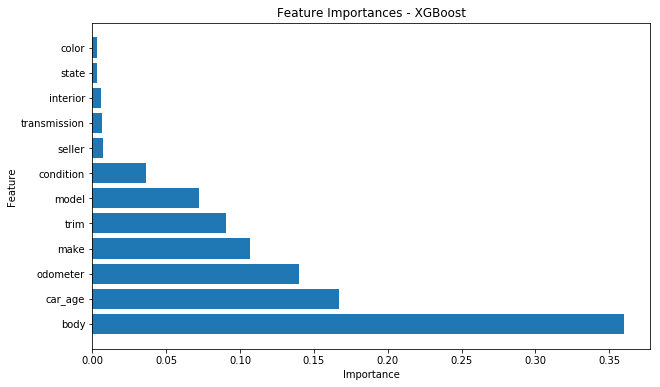

In [83]:
importances_xgboost = xgboost.feature_importances_
feature_importances_xgboost = pd.DataFrame({'Feature': training_features, 'Importance': importances_xgboost})
feature_importances_xgboost = feature_importances_xgboost.sort_values('Importance', ascending=False)
print("\nFeature Importances for XGBoost:")
print(feature_importances_xgboost)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_xgboost['Feature'], feature_importances_xgboost['Importance'])
plt.title('Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()